## Herd immunity calculator
**Philip Machanick**\
*17 April 2020*

Assumes fixed value of $R_0$, assuming $E=1$, i.e., immunity is 100% post-recovery (or post-vaccination if one exists).

Calculated as
$$
P_{herd} = 1 - \frac{1}{1-R_{0}}
$$

Where $R_0$ is the basic reproduction ratio, i.e., the mean number of new infections per infected person.

**Reference**\
Paul Fine, Ken Eames, and David L Heymann. “Herd immunity”: a rough guide. *Clinical Infectious Diseases*, 52(7):911–916, 2011

In [1]:
%%capture
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set up parameters
R0min = 1
R0max = 10
R0stepsize = 0.01
E = 1;  # effectiveness of vaccine: 1 = 100%

In [4]:
R0vals = np.arange (R0min, R0max, R0stepsize)
def herdThreshold (R0):
    return 1-1/R0;

herdThresholdVals = herdThreshold (R0vals)

# uncomment to see values
# print (herdThresholdVals);

In [5]:
print(herdThreshold (2.5));
print(herdThreshold (4));

0.6
0.75


Text(0.8, 0.45, '$R_0=2.5$, herd = 0.6')

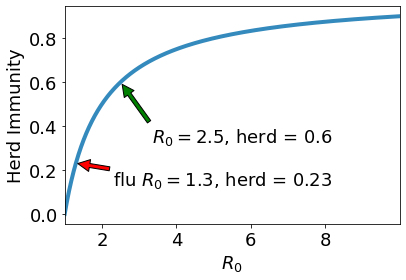

In [7]:
plt.autoscale(enable=True, axis='x', tight=True)
plt.rcParams.update({'font.size': 18})
plt.plot(R0vals, herdThresholdVals, '-', color="#348ABD", label='$Herd Immunity$', lw=4)
plt.xlabel('$R_0$')
plt.ylabel('Herd Immunity')

# https://matplotlib.org/tutorials/text/annotations.html
# https://stackoverflow.com/questions/16948256/cannot-concatenate-str-and-float-objects
plt.annotate('flu $R_0=1.3$, herd = ' + str(round(herdThreshold(1.3),2)),xy=(1.3,herdThreshold(1.3)), xycoords='data',xytext=(0.8, 0.25), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.annotate('$R_0=2.5$, herd = ' + str(herdThreshold(2.5)),xy=(2.5,herdThreshold(2.5)), xycoords='data',xytext=(0.8, 0.45), textcoords='axes fraction',
            arrowprops=dict(facecolor='green', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

#https://stackoverflow.com/questions/21288062/second-y-axis-label-getting-cut-off
# plt.savefig("/Users/philip/Desktop/herdimmunity.pdf", bbox_inches='tight');